In [1]:
"""
@author: BSSE 0917
"""

'\n@author: BSSE 0917\n'

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm

In [5]:
data = pd.read_csv("D:\\8th SEmester\\Software Matrix(SE-843)\\survey_results_public.csv")
data = data.replace('NA',np.nan)
#data

,Respondent,LanguageDesireNextYear,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [9]:
colab_desired_github = data['NEWCollabToolsDesireNextYear'].str.contains('Github',na = False)
#colab_desired_github
years_github = data[colab_desired_github]['YearsCode']
#years_github



In [10]:
colab_desired_slack = data['NEWCollabToolsDesireNextYear'].str.contains('Slack',na = False)
#colab_desired_slack
years_slack= data[colab_desired_slack]['YearsCode']
#years_slack

1                       7
5                       6
10                     10
16                      7
18                      9
               ...       
64423    Less than 1 year
64427                  16
64429                   1
64437    Less than 1 year
64446                   6
Name: YearsCode, Length: 21119, dtype: object

In [11]:
colab_desired_jira = data['NEWCollabToolsDesireNextYear'].str.contains('Jira',na = False)
#colab_desired_jira
years_jira= data[colab_desired_jira]['YearsCode']
#years_jira

10                     10
13                      5
22                      8
23                     30
24                     23
               ...       
64411    Less than 1 year
64422                   5
64423    Less than 1 year
64427                  16
64446                   6
Name: YearsCode, Length: 15796, dtype: object

In [16]:
years_github = years_github.dropna().replace('Less than 1 year',0.5).replace('More than 50 years',55)
years_slack = years_slack.dropna().replace('Less than 1 year',0.5).replace('More than 50 years',55)
years_jira = years_jira.dropna().replace('Less than 1 year',0.5).replace('More than 50 years',55)

years_github = pd.to_numeric(years_github)
years_slack = pd.to_numeric(years_slack)
years_jira = pd.to_numeric(years_jira)

#years_slack
#years_slack
#years_github

1         7.0
5         6.0
10       10.0
16        7.0
18        9.0
         ... 
64423     0.5
64427    16.0
64429     1.0
64437     0.5
64446     6.0
Name: YearsCode, Length: 20442, dtype: float64

In [19]:
years_github=years_github[years_github>0]
years_slack=years_slack[years_slack>0]
years_jira=years_jira[years_jira>0]
#years_slack
#years_slack
#years_github

1         7.0
4        15.0
5         6.0
9         8.0
10       10.0
         ... 
64429     1.0
64433    30.0
64438     0.5
64441     7.0
64446     6.0
Name: YearsCode, Length: 35627, dtype: float64

In [20]:
##pRINItiNG sTATS

t,p = stats.ttest_ind(years_github,years_slack,equal_var= True)

print("t = %g , p = %g" %(t,p))

t = -3.57778 , p = 0.00034681


In [24]:
### PRINT median,describe,mode
print(years_github.describe())
print(years_github.median())
print(years_github.mode())

print(years_slack.describe())
print(years_slack.median())
print(years_slack.mode())


print(years_jira.describe())
print(years_jira.median())
print(years_jira.mode())

count    35627.000000
mean        12.553358
std          9.394449
min          0.500000
25%          6.000000
50%         10.000000
75%         17.000000
max         55.000000
Name: YearsCode, dtype: float64
10.0
0    10.0
dtype: float64
count    20442.000000
mean        12.842432
std          8.874841
min          0.500000
25%          6.000000
50%         10.000000
75%         17.000000
max         55.000000
Name: YearsCode, dtype: float64
10.0
0    10.0
dtype: float64
count    15228.000000
mean        13.434102
std          9.058717
min          0.500000
25%          7.000000
50%         11.000000
75%         18.000000
max         55.000000
Name: YearsCode, dtype: float64
11.0
0    10.0
dtype: float64


In [25]:
#sm.qqplot(np.log(years_android), line = 'r')
'''years_github.plot.box()
years_slack.plot.box()
years_jira.plot.box()
'''
# levene check variance 

result=stats.levene(years_github,years_slack,years_jira)
print(result)

LeveneResult(statistic=11.072658368786042, pvalue=1.5557946324790414e-05)


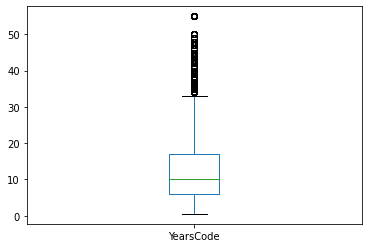

In [29]:
#box plot 
years_github.plot.box()
#years_slack.plot.box()
#years_jira.plot.box()


anova result: f = 49.1905 p = 4.48312e-22


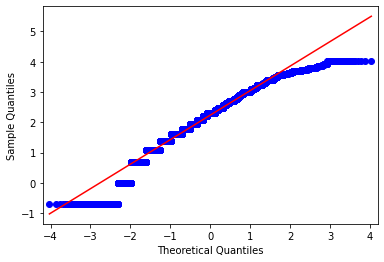

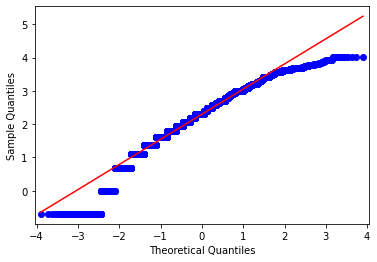

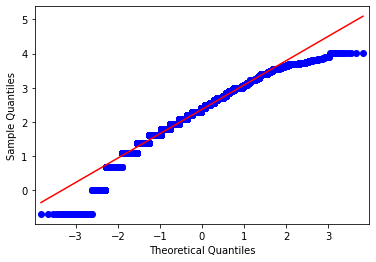

In [30]:
########################################################################
sm.qqplot(np.log(years_github), line = 'r')

sm.qqplot(np.log(years_slack), line = 'r')

sm.qqplot(np.log(years_jira), line = 'r')


f_anova,p_anova = (stats.f_oneway(years_github, years_slack,years_jira))
print("anova result: f = %g p = %g" % (f_anova,p_anova))


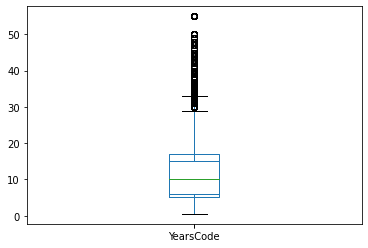

In [31]:
years_github.plot.box()
l=years_github.quantile(.25)
u= years_github.quantile(.75)
IQR=u-l
upper_limit= u+1.5*IQR
lower_limit= l-1.5*IQR
years_github_logged=years_github[(years_github<=upper_limit) & (years_github>=lower_limit)]
years_github_logged.plot.box()
